# MODELING RUMORS: THE NO PLANE PENTAGON FRENCH HOAX CASE

A python based implementation of the technique described in the paper "[Modeling Rumors:The No Plane Pentagon French Hoax Case](https://arxiv.org/abs/cond-mat/0211571)" by [Serge Galam](mailto:galam@ccr.jussieu.fr) of CNRS, Paris.

**ABSTRACT :**  
The recent astonishing wide adhesion of french people to the rumor claiming ‘No plane did crash on the Pentagon on September the 11”, is given a generic explanation in terms of a model of minority opinion spreading. Using a majority rule reaction-diffusion dynamics, a rumor is shown to invade for sure a social group provided it fulfills simultaneously two criteria. First it must initiate with a support beyond some critical threshold which however, turns out to be always very low. Then it has to be consistent with some larger collective social paradigm of the group. Othewise it just dies out. Both conditions were satisfied in the french case with the associated book sold at more than 200 000 copies in just a few days. The rumor was stopped by the firm stand of most newspaper editors stating it is nonsense. Such an incredible social dynamics is shown to result naturally from an open and free public debate among friends and colleagues. Each one searching for the truth sincerely on a free will basis and without individual biases. The polarization process appears also to be very quick in agreement with reality. It is a very strong anti-democratic reversal of opinion although made quite democratically. The model may apply to a large range of rumors.


In [1]:
import numpy as np
from sympy.solvers import solve
from sympy import Symbol
import math
import matplotlib.pyplot as plt

In [2]:
def nCr(n,r):
    f = math.factorial
    return f(n) // (f(r)*f(n-r))

## Some Important Variables

In this section we se tup some important variables which are required for the running of the code.  
*MaxGroupSize*- Defines the biggest group size a person can interact with (IMHO should not exceed the group of 7 people in small social gatherings).  
*maxDays*- The no. of days you want to study the evolution of people's believe  
*BelieveTruth* - The ratio of people believing in the truth(not believing the rumor)

In [3]:
MaxGroupSize=7     #DO NOT CHANGE!! 
maxDays=20         
BelieveTruth=0.80 

## Building the Probability of Interaction in Every Group Size

This section creates the probability distribution for each size of group that a single person interacts with in a single day. Uncomment each of the array indexes and enter the number of times the population interact with other people equal to the index of a in a day. The example below should give more clarity.

examples:

* a[0]=2 -> means the population interacts with 0 people 2 times a day (Talk to themselves maybe ;P)
* a[3]=5 -> means the population interacts with 3 people 5 times a day

In [4]:
a=np.zeros(MaxGroupSize)
def SetArray():
    #a[0]=0
    a[1]=1
    a[2]=1
    a[3]=1
    #a[4]=1
    #a[5]=1
    #a[6]=1
SetArray()

## What is the killing point?

This section defines the function *KillingPointFinder*,which determines the killing points for the interaction pattern described.

In [5]:
def KillingPointFinder(array):
    array=array/array.sum()
    x = Symbol('x')
    potentialKillingPoints=np.array(solve((array[0]-1)*x
                              +(array[1]+3*array[2])*x**2
                              +(-2*array[2]+4*array[3]+10*array[4])*x**3
                              +(-3*array[3]-15*array[4]+15*array[5]+35*array[6])*x**4
                              +(6*array[4]-24*array[5]-84*array[6])*x**5
                              +(10*array[5]+70*array[6])*x**6
                              +50*array[6]*x**7, x))
    location=np.where(np.logical_and(potentialKillingPoints>0, potentialKillingPoints<1))
    KillingPoints=float(potentialKillingPoints[location])
    
    return KillingPoints
    

In [6]:
print("The killing point is at",float("{0:.4f}".format(KillingPointFinder(a))))

The killing point is at 0.8471


## Will the rumor survive or die out?

This section tries to identify whether the rumor will survive or die out. The check simply checks if the initial number of people believing in the truth is higher than the killing point the rumor will die out. Else, The rumor will survive and spread in the population.  

In [7]:
if BelieveTruth>KillingPointFinder(a) :
    print("The rumor will die out from the population")
else:
    print("The rumor will spread throughout the population")

The rumor will spread throughout the population


## How does the rumor evolve over time?

This section defines the function *rumorEvolution*, which determines how the evolution of the rumor takes place for upto *maxDays*, for a given starting point *BelieveTruth* and interaction pattern, all defined in the start.

In [8]:
P=np.zeros(maxDays)
P[0]=BelieveTruth

In [9]:
def rumorEvolution(P_plus,array):
    innersum=0
    outersum=0
    array=array/array.sum()
    for t in range(0,maxDays-1):
        for k in range(1,MaxGroupSize+1):
            for j in range(int(k/2+1),k+1):
                innersum=innersum+nCr(k,j)*(P_plus[t]**j)*(1-P_plus[t])**(k-j)
            outersum=outersum+array[k-1]*innersum
            innersum=0
        P_plus[t+1]=outersum
        outersum=0
    return P_plus
P=rumorEvolution(P,a)

## Lets Visualize the Evolution of Rumor

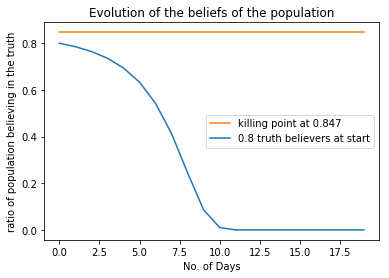

In [10]:
plt.figure(1)
start,=plt.plot(range(0,maxDays),P,label=str(float("{0:.3f}".format(P[0])))+' truth believers at start')
P_killing=np.ones(maxDays)*KillingPointFinder(a)
equal,=plt.plot(range(0,maxDays),P_killing,label='killing point at '+str(float("{0:.3f}".format(KillingPointFinder(a)))))
plt.legend(handles=[ equal,start])
plt.title('Evolution of the beliefs of the population')
plt.ylabel("ratio of population believing in the truth")
plt.xlabel("No. of Days")
plt.show()

## How the Killing point is affected?

In this section, I evaluate how the killing point is affected with the increase in interaction of population in smaller groups vs that of larger groups. I increase the interaction with 2 and 3 people by keeping rest of the interaction parameters to study the evolution of the killing point.

In [11]:
indexs=[2,3]
SetArray()
killingCollection=[]

for index in indexs:
    killing=np.array([])
    for i in range(1,20):
        a[index]=i
        killing=np.append(killing,KillingPointFinder(a))
    killingCollection.append(killing)
    a[index]=1

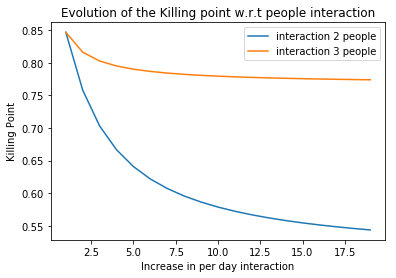

In [12]:
plt.figure(2)
twoPeople, =plt.plot(range(1,20),killingCollection[0],label='interaction 2 people')
threePeople, =plt.plot(range(1,20),killingCollection[1],label='interaction 3 people')
plt.title('Evolution of the Killing point w.r.t people interaction')
plt.ylabel("Killing Point")
plt.xlabel("Increase in per day interaction")
plt.legend(handles=[twoPeople, threePeople])
plt.show()

The killing point lowers with the increase in each type of interaction and then saturates at some time. The saturation point is reached faster for the interaction involving more people. Therefore, it is easier to spread rumors with higher interaction, as the killing point is sufficiently higher(i.e less no of people are required to believe the rumor). Also, the interaction of large number people does not require a higher number of such interaction after the saturation point is achieved. 

## How Fast Rumor Spread?

In this section, I evaluate a hypothesis that rumor spreads faster with the increased interaction among people. I keep a fixed value of interaction for a lower number of people in a group and check how the rumor evolves and then repeat it for a higher number of people in a group.

In [13]:
SetArray()
a[2]=5
P_2=np.zeros(maxDays)
P_2[0]=0.60
P_2=rumorEvolution(P_2,a)
SetArray()
a[3]=5
P_3=np.zeros(maxDays)
P_3[0]=0.60
P_3=rumorEvolution(P_3,a)

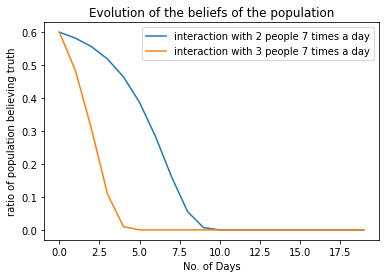

In [14]:
plt.figure(3)
higher,=plt.plot(range(0,maxDays),P_2,label='interaction with 2 people 7 times a day')
lower,=plt.plot(range(0,maxDays),P_3,label='interaction with 3 people 7 times a day')
plt.title('Evolution of the beliefs of the population')
plt.ylabel("ratio of population believing truth")
plt.xlabel("No. of Days")
plt.legend(handles=[higher, lower])
plt.show()

The hypothesis is accepted, as from the graph it is visible the interaction of larger groups spread the misinformation faster.

## Rumors Spread Fast and Contract Slow

In this section, I evaluate a hypothesis that rumors spread much faster than compared to that of the dying of the rumor. I keep all conditions similar and only vary the starting ratios equal to killing point, 1% higher than the killing point and 1% lower than the killing point.

In [15]:
SetArray()
KillingPoints=KillingPointFinder(a)

In [16]:
P_higher=np.zeros(maxDays)
P_higher[0]=KillingPoints+0.01*KillingPoints
P_killing=np.ones(maxDays)*KillingPoints
P_lower=np.zeros(maxDays)
P_lower[0]=KillingPoints-0.01*KillingPoints

In [17]:
P_higher=rumorEvolution(P_higher,a)
P_lower=rumorEvolution(P_lower,a)

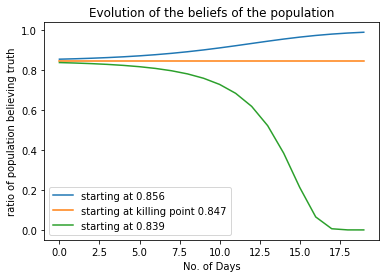

In [18]:
plt.figure(4)
higher,=plt.plot(range(0,maxDays),P_higher,label='starting at '+str(float("{0:.3f}".format(P_higher[0]))))
equal,=plt.plot(range(0,maxDays),P_killing,label='starting at killing point '+str(float("{0:.3f}".format(KillingPoints))))
lower,=plt.plot(range(0,maxDays),P_lower,label='starting at '+str(float("{0:.3f}".format(P_lower[0]))))
plt.title('Evolution of the beliefs of the population')
plt.ylabel("ratio of population believing truth")
plt.xlabel("No. of Days")
plt.legend(handles=[higher, equal, lower])
plt.show()

The hypothesis is indeed proven correct in this particular case the rumor spreads to 100 % of the population in about 17 days whereas the dying of the rumor is not reached in even 20 days.